<a href="https://colab.research.google.com/github/faridd35/UAS-decision-tree/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset path: https://raw.githubusercontent.com/faridd35/UAS-decision-tree/refs/heads/main/data_pinjaman_tree.csv

In [ ]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Identifikasi dan Membaca Dataset

path = "https://raw.githubusercontent.com/faridd35/UAS-decision-tree/refs/heads/main/data_pinjaman_tree.csv"
df = pd.read_csv(path)
# df.head()
df

,JenisKelamin,StatusPernikahan,JumTanggungan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,riwayat_pinjaman,Pendidikan_Tinggi,Wilayah_Tempat_Tinggal,StatusPinjaman
0,Laki-laki,Belum Menikah,0,Tidak,5849,0,128.0,360.0,memenuhi,Tidak,perkotaan,Ya
1,Laki-laki,Sudah Menikah,1,Tidak,4583,1508,128.0,360.0,memenuhi,Tidak,pedesaan,Tidak
2,Laki-laki,Sudah Menikah,0,Ya,3000,0,66.0,360.0,memenuhi,Tidak,perkotaan,Ya
3,Laki-laki,Sudah Menikah,0,Tidak,2583,2358,120.0,360.0,memenuhi,Ya,perkotaan,Ya
4,Laki-laki,Belum Menikah,0,Tidak,6000,0,141.0,360.0,memenuhi,Tidak,perkotaan,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Wanita,Belum Menikah,0,Tidak,2900,0,71.0,360.0,memenuhi,Tidak,pedesaan,Ya
610,Laki-laki,Sudah Menikah,3,Tidak,4106,0,40.0,180.0,memenuhi,Tidak,pedesaan,Ya
611,Laki-laki,Sudah Menikah,1,Tidak,8072,240,253.0,360.0,memenuhi,Tidak,perkotaan,Ya
612,Laki-laki,Sudah Menikah,2,Tidak,7583,0,187.0,360.0,memenuhi,Tidak,perkotaan,Ya


In [ ]:
# Menampilkan Struktur DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   JenisKelamin            614 non-null    object 
 1   StatusPernikahan        614 non-null    object 
 2   JumTanggungan           614 non-null    int64  
 3   Wiraswasta              614 non-null    object 
 4   IncomeNasabah           614 non-null    int64  
 5   IncomePasangan          614 non-null    int64  
 6   JumlahPinjaman          614 non-null    float64
 7   JangkaWaktuPinjaman     614 non-null    float64
 8   riwayat_pinjaman        614 non-null    object 
 9   Pendidikan_Tinggi       614 non-null    object 
 10  Wilayah_Tempat_Tinggal  614 non-null    object 
 11  StatusPinjaman          614 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 57.7+ KB


**Tahap Data Preprocessing**

Dengan melakukan teknik *Encoding* pada kolom dengan *Data Type* 'object' atau data teks menjadi data numerik

Dari tahap ini akan menghasilkan DataFrame baru dengan nama 'df_encoded'

In [ ]:
# One-Hot Encoding

df_encoded = pd.get_dummies(df, columns=['JenisKelamin', 'StatusPernikahan', 'Wiraswasta', 'riwayat_pinjaman', 'Pendidikan_Tinggi', 'Wilayah_Tempat_Tinggal'], drop_first=True)

In [ ]:
# Label Encoding

le = LabelEncoder()
df_encoded['StatusPinjaman'] = le.fit_transform(df_encoded['StatusPinjaman'])

# Menampilkan Struktur DataFrame Setelah Dilakukan Tahap Encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JumTanggungan                     614 non-null    int64  
 1   IncomeNasabah                     614 non-null    int64  
 2   IncomePasangan                    614 non-null    int64  
 3   JumlahPinjaman                    614 non-null    float64
 4   JangkaWaktuPinjaman               614 non-null    float64
 5   StatusPinjaman                    614 non-null    int64  
 6   JenisKelamin_Wanita               614 non-null    bool   
 7   StatusPernikahan_Sudah Menikah    614 non-null    bool   
 8   Wiraswasta_Ya                     614 non-null    bool   
 9   riwayat_pinjaman_tidak memenuhi   614 non-null    bool   
 10  Pendidikan_Tinggi_Ya              614 non-null    bool   
 11  Wilayah_Tempat_Tinggal_perkotaan  614 non-null    bool   
dtypes: bool(

In [ ]:
# Mendefinisikan variabel independen (X) dan variabel dependen (y)

X = df_encoded.drop('StatusPinjaman', axis=1)
y = df_encoded['StatusPinjaman']

# Melakukan Split Pada Data: 80% untuk Train dan 20% untuk Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Tahap Pembuatan dan Melatih Model Decision Tree**

In [ ]:
# Membuat Model Decision Tree dengan Kedalaman Maksimal = 4
treeModel = DecisionTreeClassifier(max_depth = 4, random_state = 42)

# Menggunakan data train untuk melakukan perhitungan gini impurity dan information gain pada model
treeModel = treeModel.fit(X_train, y_train)

In [ ]:
# Melakukan Prediksi Hasil dari (y) dengan Data Test (X)
y_pred = treeModel.predict(X_test)

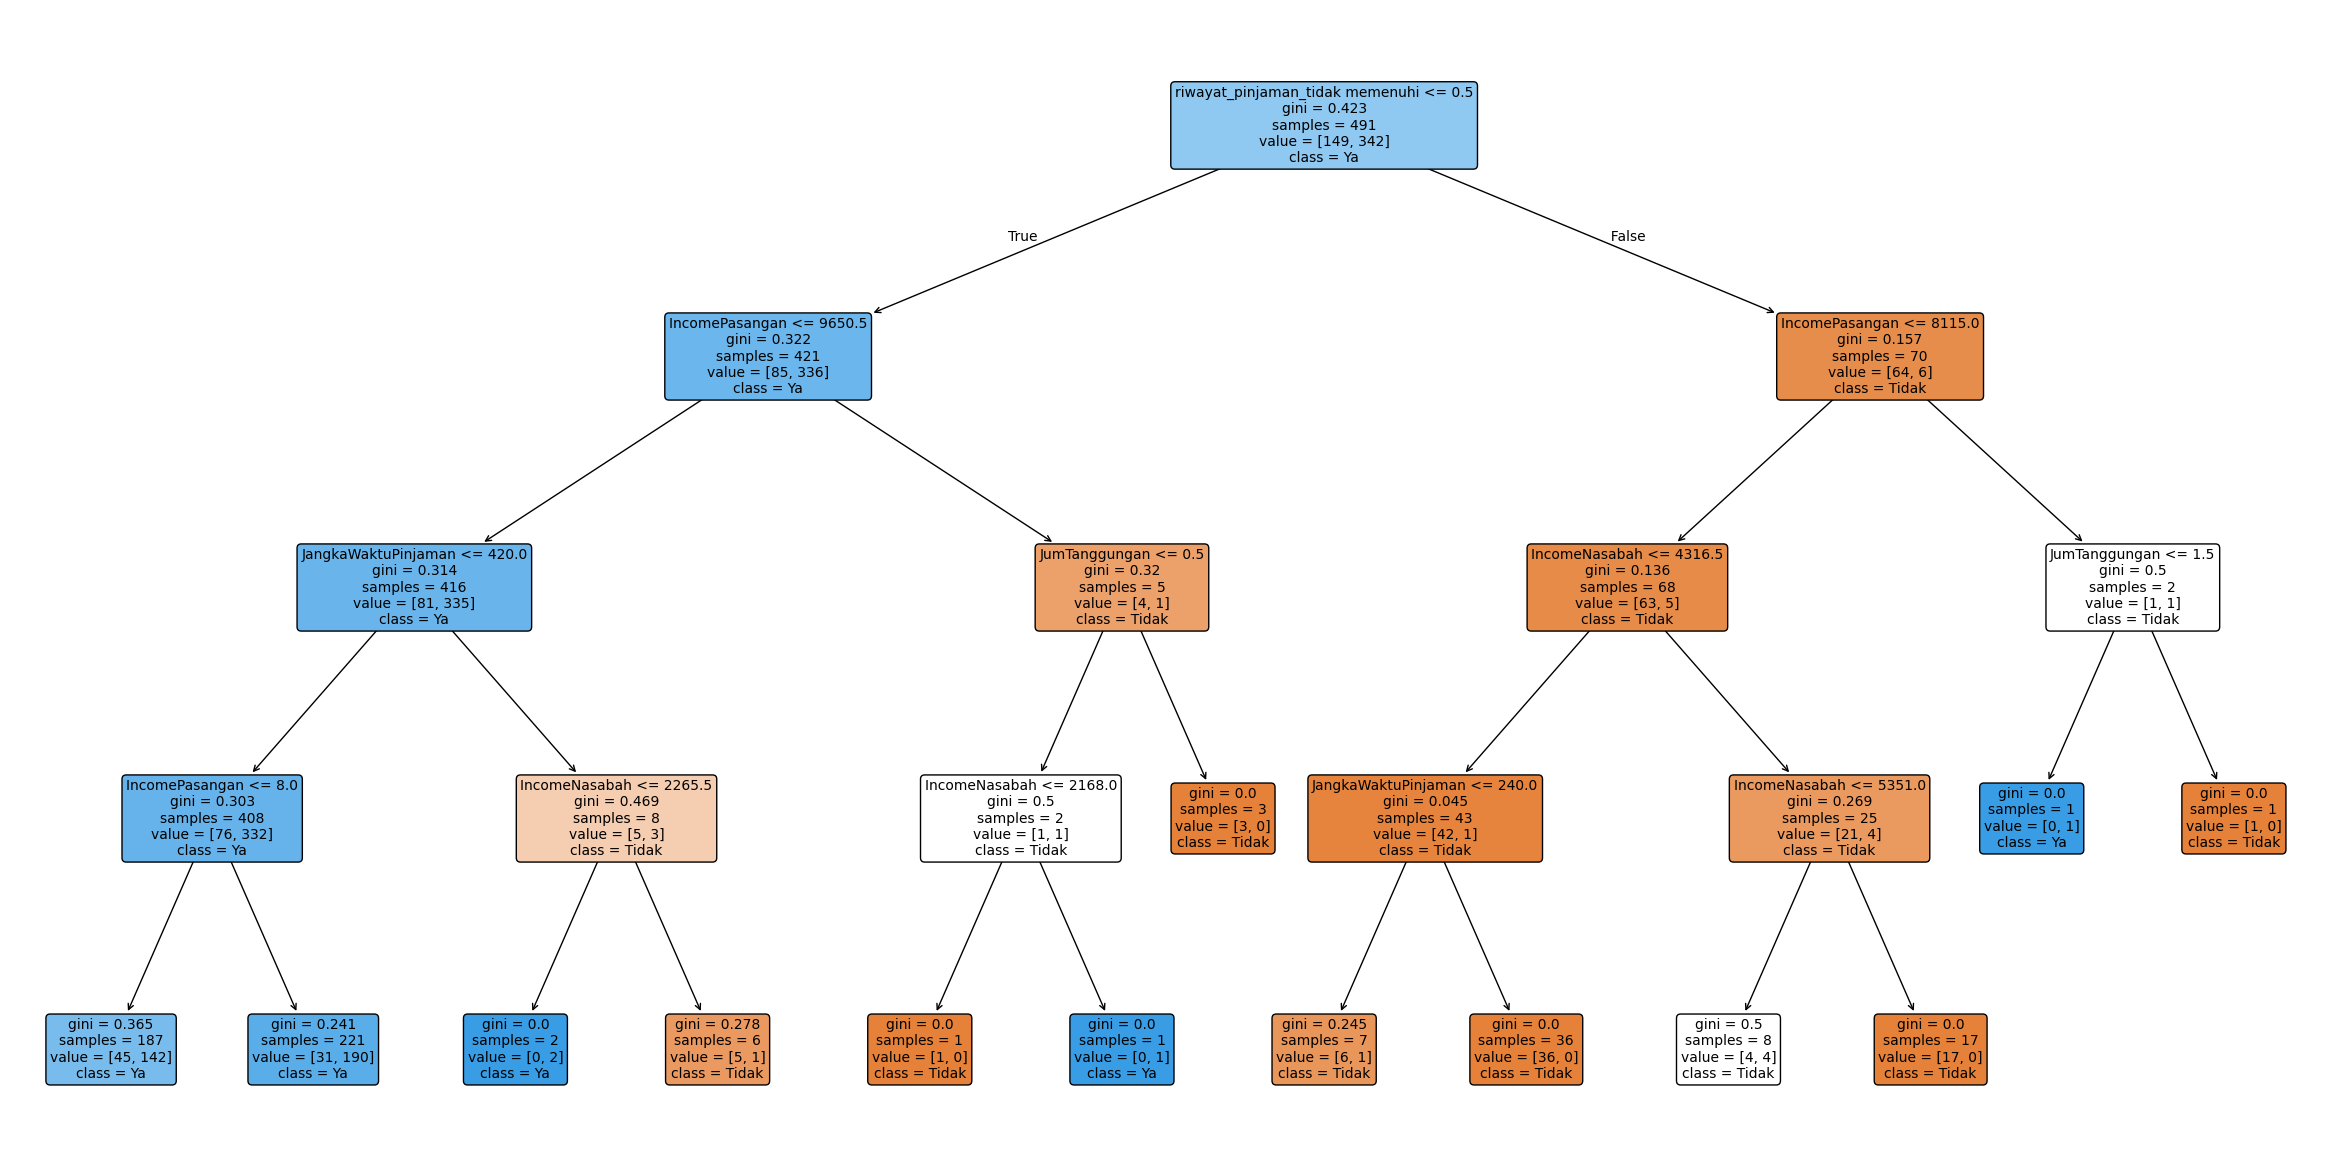

In [ ]:
# Memvisualisasikan Decision Tree
plt.figure(figsize=(30,15))

plot_tree(treeModel,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)

plt.show()

**Tahap Evaluasi Hasil**

In [ ]:
# Menilai Akurasi Prediksi Dari Data Test (y)

akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi * 100:.2f}%")

Akurasi Model: 77.24%


In [ ]:
# Menampilkan Laporan Klasifikasi Dari Hasil Prediksi Pada Data Test (y)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Tidak       0.86      0.42      0.56        43
          Ya       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [ ]:
print(export_text(treeModel, feature_names=list(X.columns)))

|--- riwayat_pinjaman_tidak memenuhi <= 0.50
|   |--- IncomePasangan <= 9650.50
|   |   |--- JangkaWaktuPinjaman <= 420.00
|   |   |   |--- IncomePasangan <= 8.00
|   |   |   |   |--- class: 1
|   |   |   |--- IncomePasangan >  8.00
|   |   |   |   |--- class: 1
|   |   |--- JangkaWaktuPinjaman >  420.00
|   |   |   |--- IncomeNasabah <= 2265.50
|   |   |   |   |--- class: 1
|   |   |   |--- IncomeNasabah >  2265.50
|   |   |   |   |--- class: 0
|   |--- IncomePasangan >  9650.50
|   |   |--- JumTanggungan <= 0.50
|   |   |   |--- IncomeNasabah <= 2168.00
|   |   |   |   |--- class: 0
|   |   |   |--- IncomeNasabah >  2168.00
|   |   |   |   |--- class: 1
|   |   |--- JumTanggungan >  0.50
|   |   |   |--- class: 0
|--- riwayat_pinjaman_tidak memenuhi >  0.50
|   |--- IncomePasangan <= 8115.00
|   |   |--- IncomeNasabah <= 4316.50
|   |   |   |--- JangkaWaktuPinjaman <= 240.00
|   |   |   |   |--- class: 0
|   |   |   |--- JangkaWaktuPinjaman >  240.00
|   |   |   |   |--- class: 0
|  